In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('./dataset/the-office-lines.xlsx')

In [2]:
df.head()

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59909 entries, 0 to 59908
Data columns (total 7 columns):
id           59909 non-null int64
season       59909 non-null int64
episode      59909 non-null int64
scene        59909 non-null int64
line_text    59909 non-null object
speaker      59909 non-null object
deleted      59909 non-null bool
dtypes: bool(1), int64(4), object(2)
memory usage: 2.8+ MB


In [4]:
df.shape

(59909, 7)

In [5]:
column_names = df.columns
column_names

Index(['id', 'season', 'episode', 'scene', 'line_text', 'speaker', 'deleted'], dtype='object')

In [6]:
df.dtypes

id            int64
season        int64
episode       int64
scene         int64
line_text    object
speaker      object
deleted        bool
dtype: object

In [ ]:
main_characters = ['Michael','Dwight','Jim','Pam','Stanley','Phyllis','Andy','Ryan','Kelly','Toby','Creed','Meredith']

# Explorng Deleted Scenes

In [7]:
df['deleted'].value_counts()

False    57973
True      1936
Name: deleted, dtype: int64

In [36]:
df[df['deleted']==True]

,id,season,episode,scene,line_text,speaker,deleted
229,230,1,1,40,"Dwight Schrute. My father's name, also Dwight ...",Dwight,True
230,231,1,1,40,[holding up a Dundie and pretending it is talk...,Michael,True
231,232,1,1,40,"My name is Jim Halpert and I am a sales rep, w...",Jim,True
232,233,1,1,41,Pam! Pam-Pam! Pam has been with us for... for...,Michael,True
233,234,1,1,41,I guess.,Pam,True
...,...,...,...,...,...,...,...
13320,13321,3,12,40,Yeah. Can I see it when I get back?,Jim,True
13321,13322,3,12,40,Yeah.,Pam,True
13322,13323,3,12,40,Congratulations.,Jim,True
13323,13324,3,12,40,Thanks.,Pam,True


In [39]:
df_del  =df.drop_duplicates(['season','episode','scene','deleted'])
df_del

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
5,6,1,1,2,"[on the phone] Yes, I'd like to speak to your ...",Michael,False
6,7,1,1,3,"I've, uh, I've been at Dunder Mifflin for 12 y...",Michael,False
15,16,1,1,4,"People say I am the best boss. They go, 'God w...",Michael,False
16,17,1,1,5,[singing] Shall I play for you? Pa rum pump um...,Dwight,False
...,...,...,...,...,...,...,...
59904,59905,9,23,112,It all seems so very arbitrary. I applied for ...,Creed,False
59905,59906,9,23,113,I just feel lucky that I got a chance to share...,Meredith,False
59906,59907,9,23,114,I���m happy that this was all filmed so I can ...,Phyllis,False
59907,59908,9,23,115,I sold paper at this company for 12 years. My ...,Jim,False


In [43]:
df_del.groupby('season')['deleted'].value_counts().to_dict()

{(1, False): 238,
 (1, True): 68,
 (2, False): 1053,
 (2, True): 239,
 (3, False): 1386,
 (3, True): 5,
 (4, False): 882,
 (5, False): 1130,
 (6, False): 1023,
 (7, False): 1002,
 (8, False): 1027,
 (9, False): 1108}

In [44]:
df_del['deleted'].value_counts()

False    8849
True      312
Name: deleted, dtype: int64

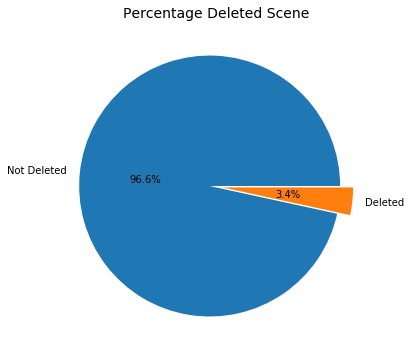

In [51]:
plt.figure(figsize=(10,6))
labels = ['Not Deleted','Deleted']
values = df_del['deleted'].value_counts().values
plt.pie(x=values, autopct='%.1f%%',explode=[0.05]*2,labels=labels, pctdistance=0.5)
plt.title('Percentage Deleted Scene', fontsize=14)
plt.savefig("DeliveryPieChart.png")
plt.show()

In [52]:
df = df[df['deleted']==False]
df.head()

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False


In [54]:
df.shape

(57973, 7)

In [55]:
df.drop(['id','deleted'],inplace=True,axis=1)
df.head()

,season,episode,scene,line_text,speaker
0,1,1,1,All right Jim. Your quarterlies look very good...,Michael
1,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim
2,1,1,1,So you've come to the master for guidance? Is ...,Michael
3,1,1,1,"Actually, you called me in here, but yeah.",Jim
4,1,1,1,"All right. Well, let me show you how it's done.",Michael


In [56]:
df.isnull().sum()

season       0
episode      0
scene        0
line_text    0
speaker      0
dtype: int64

In [57]:
df.groupby('season')['episode'].nunique()

season
1     6
2    22
3    23
4    14
5    26
6    24
7    24
8    24
9    23
Name: episode, dtype: int64

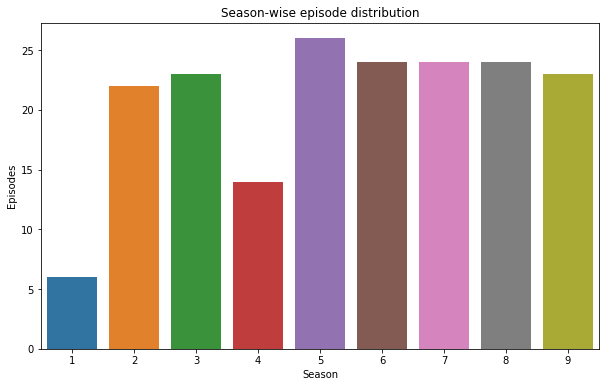

In [65]:
plt.figure(figsize=(10,6))

seasons = df['season'].unique().tolist()
episodes = df.groupby('season')['episode'].nunique().tolist()

sns.barplot(x=seasons,y=episodes)
plt.title('Season-wise episode distribution')
plt.xlabel('Season')
plt.ylabel('Episodes')
plt.savefig('Seson-wise-distribution.png')
plt.show()